In [1]:
!date

Wed Dec 11 14:36:47 EST 2024


In [2]:
pwd

'/mmfs1/data/aglinska/BC-ABCD-denoise/Code'

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
import ants

/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
subs = [sub for sub in os.listdir('../Data/020-fmriprepped/') if all((sub.startswith('sub-'),not sub.endswith('.html')))]
subs.sort()
subs = np.array(subs)
n_subs = len(subs)
print(n_subs)

34


In [6]:
np.sort(np.array(os.listdir('../Data/050-Data-DeepCor-ed/')))

array(['001-linear-16-256', 'linear-200-epochs',
       'linear-200-epochs-fgreg-50', 'linear-large-csf-wm-noreg',
       'linear-newtest', 'linear-newtest-v2', 'linear-newtest-v3',
       'nonlinear-newtest-v4', 'test'], dtype='<U26')

In [7]:
#indir = '../Data/050-Data-DeepCor-ed/linear-200-epochs-fgreg-50'
indir = '../Data/050-Data-DeepCor-ed/nonlinear-newtest-v4/'
#os.listdir(indir)[0:10]

In [8]:
# sub = 0
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=0)),
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=1)),
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=2)),
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=3)),
# os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=4)),)

In [9]:
ffa = ants.image_read('../Misc/ffa_mask_resampled.nii')

In [13]:
ffa_mask = ants.image_read('../Misc/ffa_map_resampled.nii')
thresh = 10
ffa_mask[ffa_mask<thresh]=0
ffa_mask[ffa_mask>=thresh]=1
(ffa_mask.numpy()).sum()

682.0

In [14]:
# subs = subs[check_done.mean(axis=0)==1]
# n_subs = len(subs)

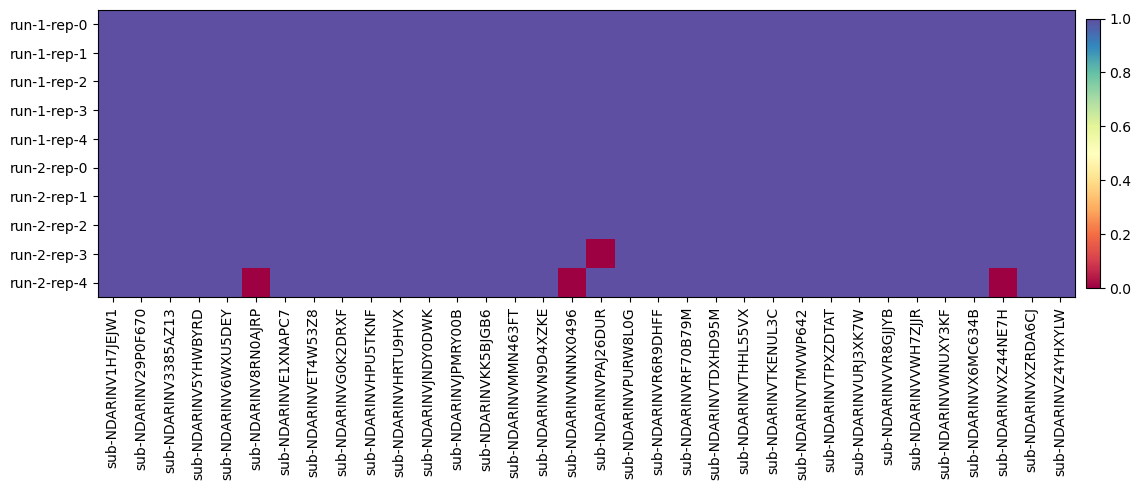

In [15]:
check_done = np.array(([os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=0))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=1))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=2))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=3))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=4))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=0))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=1))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=2))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=3))) for sub in subs],
[os.path.exists(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=4))) for sub in subs],))

plt.figure(figsize=(15,5))
plt.imshow(check_done,vmin=0,vmax=1,cmap='Spectral')
plt.colorbar(shrink=.7,pad=0.01)

ys = np.hstack([['run-{r}-rep-{rep}'.format(r=r,rep=rep) for rep in np.arange(5)] for r in [1,2]]);
plt.yticks(np.arange(len(ys)),labels=ys);

plt.xticks(np.arange(len(subs)),labels=subs,rotation=90);

In [16]:
preproc_1 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-preproc-{sub}-run-{r}.nii'.format(sub=sub,r=1)) for sub in subs]
preproc_2 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-preproc-{sub}-run-{r}.nii'.format(sub=sub,r=2)) for sub in subs]

compcor_1 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-COMPCORR-{sub}-run-{r}.nii'.format(sub=sub,r=1)) for sub in subs]
compcor_2 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-COMPCORR-{sub}-run-{r}.nii'.format(sub=sub,r=2)) for sub in subs]

deepcor_1 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-deepcor-FG-{sub}-run-{r}.nii'.format(sub=sub,r=1)) for sub in subs]
deepcor_2 = [ants.image_read('../Data/060-Corr2Reg-baseline/corrDiff-deepcor-FG-{sub}-run-{r}.nii'.format(sub=sub,r=2)) for sub in subs]

In [17]:
# fgs1_0 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=0))) for sub in subs]
# tgs1_0 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=0))) for sub in subs]

# fgs1_1 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=1))) for sub in subs]
# tgs1_1 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=1))) for sub in subs]

# fgs1_2 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=2))) for sub in subs]
# tgs1_2 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=2))) for sub in subs]

# fgs1_3 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=3))) for sub in subs]
# tgs1_3 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=3))) for sub in subs]

# fgs1_4 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=4))) for sub in subs]
# tgs1_4 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=1,rep=4))) for sub in subs]

# fgs2_0 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=0))) for sub in subs]
# tgs2_0 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=0))) for sub in subs]

# fgs2_1 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=1))) for sub in subs]
# tgs2_1 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=1))) for sub in subs]

# fgs2_2 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=2))) for sub in subs]
# tgs2_2 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=2))) for sub in subs]

# fgs2_3 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=3))) for sub in subs]
# tgs2_3 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=3))) for sub in subs]

# fgs2_4 = [ants.image_read(os.path.join(indir,'corrDiff-FG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=4))) for sub in subs]
# tgs2_4 = [ants.image_read(os.path.join(indir,'corrDiff-TG-{sub}-run-{r}-rep-{rep}.nii'.format(sub=sub,r=2,rep=4))) for sub in subs]

In [18]:
def collect_ims(fn='corrDiff-FG-{sub}-run-1-rep-{rep}.nii'):
    ims =  []
    for s in range(n_subs):
        sub = subs[s]
        reps_exist = [os.path.exists(os.path.join(indir,fn.format(sub=sub,rep=rep))) for rep in np.arange(5)]
        reps_exist = np.array(reps_exist)
        rep = np.nonzero(reps_exist)[0][0]
        im = ants.image_read(os.path.join(indir,fn.format(sub=sub,rep=rep)))
        ims.append(im)
    return ims

In [19]:
fgs_1 = collect_ims(fn='corrDiff-FG-{sub}-run-1-rep-{rep}.nii')
fgs_2 = collect_ims(fn='corrDiff-FG-{sub}-run-2-rep-{rep}.nii')
tgs_1 = collect_ims(fn='corrDiff-TG-{sub}-run-1-rep-{rep}.nii')
tgs_2 = collect_ims(fn='corrDiff-TG-{sub}-run-2-rep-{rep}.nii')

In [20]:
ffa_fgs_1 = np.array([im[ffa.numpy()==1].mean() for im in fgs_1])
ffa_tgs_1 = np.array([im[ffa.numpy()==1].mean() for im in tgs_1])
ffa_compcor_1 = np.array([im[ffa.numpy()==1].mean() for im in compcor_1])

In [21]:
(ffa_compcor_1>=.1).sum()

11

Text(0.5, 1.0, 'Face selectivity in FFA\nCorr w. Face minus Corr w. Place')

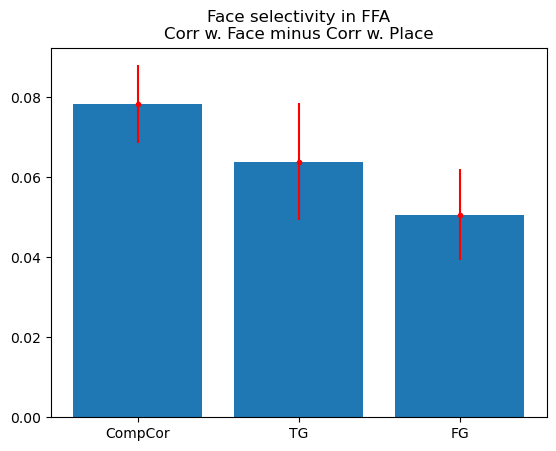

In [22]:
xs = [0,1,2]
ys = np.array([ffa_compcor_1.mean(),ffa_tgs_1.mean(),ffa_fgs_1.mean()])
se = np.array([ffa_compcor_1.std(),ffa_tgs_1.std(),ffa_fgs_1.std()])
se = se/np.sqrt(ffa_compcor_1.shape[0])
plt.bar([0,1,2],ys)
plt.errorbar(xs,ys,se,fmt='r.')
plt.xticks(xs,labels=['CompCor','TG','FG'])
plt.title('Face selectivity in FFA\nCorr w. Face minus Corr w. Place')

Text(0.5, 1.0, 'Face selectivity in FFA\nCorr w. Face minus Corr w. Place')

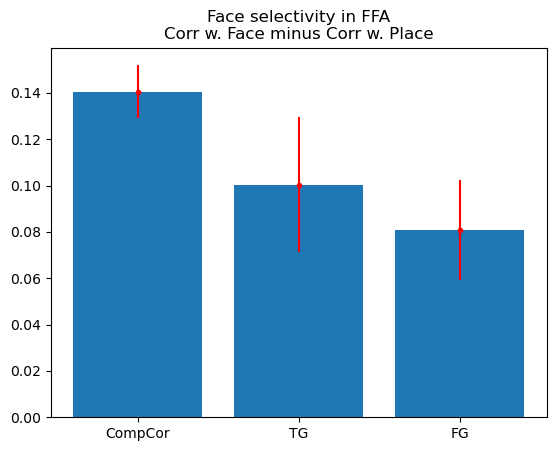

In [23]:
xs = [0,1,2]
idx = ffa_compcor_1>=.1
ys = np.array([ffa_compcor_1[idx].mean(),ffa_tgs_1[idx].mean(),ffa_fgs_1[idx].mean()])
se = np.array([ffa_compcor_1[idx].std(),ffa_tgs_1[idx].std(),ffa_fgs_1[idx].std()])
se = se/np.sqrt(ffa_compcor_1[idx].shape[0])
plt.bar([0,1,2],ys)
plt.errorbar(xs,ys,se,fmt='r.')
plt.xticks(xs,labels=['CompCor','TG','FG'])
plt.title('Face selectivity in FFA\nCorr w. Face minus Corr w. Place')

In [24]:
(ffa_tgs_1-ffa_compcor_1).mean()

-0.014288275

In [25]:
(ffa_fgs_1-ffa_compcor_1).mean()

-0.027554542

In [26]:
(ffa_tgs_1[ffa_compcor_1>=.1]-ffa_compcor_1[ffa_compcor_1>=.1]).mean()

-0.040074013

In [27]:
(ffa_fgs_1[ffa_compcor_1>=.1]-ffa_compcor_1[ffa_compcor_1>=.1]).mean()

-0.05971223

Text(0, 0.5, 'FG')

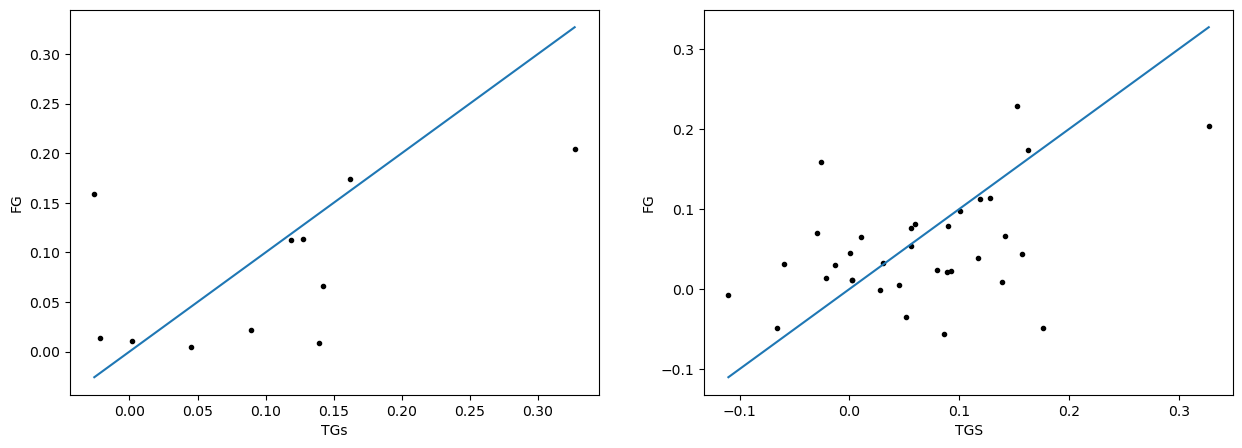

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
vec1 = ffa_tgs_1 [ffa_compcor_1>.1]
vec2 = ffa_fgs_1 [ffa_compcor_1>.1]
plt.plot(vec1,vec2,'k.')
plt.plot([vec1.min(),vec1.max()],[vec1.min(),vec1.max()])
plt.xlabel('TGs')
plt.ylabel('FG')

plt.subplot(1,2,2)
vec1 = ffa_tgs_1 #[ffa_compcor_1>.1]
vec2 = ffa_fgs_1 # [ffa_compcor_1>.1]
plt.plot(vec1,vec2,'k.')
plt.plot([vec1.min(),vec1.max()],[vec1.min(),vec1.max()])
plt.xlabel('TGS')
plt.ylabel('FG')

Text(0, 0.5, 'FG')

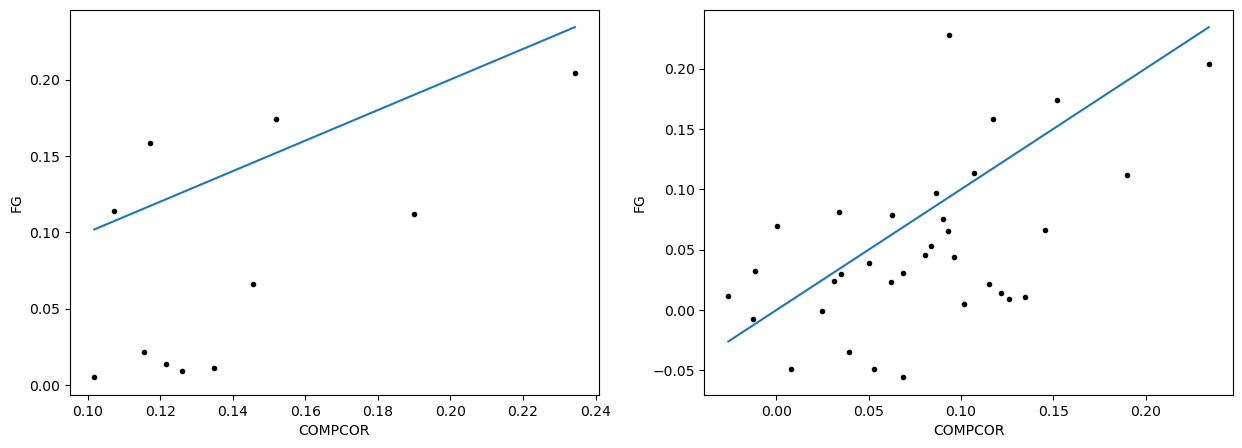

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
vec1 = ffa_compcor_1 [ffa_compcor_1>.1]
vec2 = ffa_fgs_1 [ffa_compcor_1>.1]
plt.plot(vec1,vec2,'k.')
plt.plot([vec1.min(),vec1.max()],[vec1.min(),vec1.max()])
plt.xlabel('COMPCOR')
plt.ylabel('FG')

plt.subplot(1,2,2)
vec1 = ffa_compcor_1 #[ffa_compcor_1>.1]
vec2 = ffa_fgs_1 # [ffa_compcor_1>.1]
plt.plot(vec1,vec2,'k.')
plt.plot([vec1.min(),vec1.max()],[vec1.min(),vec1.max()])
plt.xlabel('COMPCOR')
plt.ylabel('FG')

In [30]:
def collect_ims_ffa_avg(fn='deepcor-FG-{sub}-run-2-rep-{rep}.nii'):
    from tqdm import tqdm
    ims =  []
    for s in tqdm(range(n_subs)):
        sub = subs[s]
        reps_exist = [os.path.exists(os.path.join(indir,fn.format(sub=sub,rep=rep))) for rep in np.arange(5)]
        reps_exist = np.array(reps_exist)
        #print(reps_exist)
        rep = np.nonzero(reps_exist)[0][0]
        im = ants.image_read(os.path.join(indir,fn.format(sub=sub,rep=rep)))
        ims.append(im[ffa.numpy()==1].mean(axis=0))
    return ims

def get_corr2reg_arr(arr):
    corr_face = []
    corr_place = []
    for s in range(len(arr)):
        corr_face.append( np.corrcoef(arr[s],get_regs(subs[s],len(arr[s]))[0])[0,1] )
        corr_place.append( np.corrcoef(arr[s],get_regs(subs[s],len(arr[s]))[1])[0,1] )
    return corr_face,corr_place

def get_regs(sub,n_scans,r=2):

    from nilearn.glm.first_level import make_first_level_design_matrix
    import pandas as pd
    events_fn = f'../Data/010-Data_bids2/{sub}/ses-baselineYear1Arm1/func/{sub}_ses-baselineYear1Arm1_task-nback_run-0{r}_events.tsv'
    events = pd.read_csv(events_fn,delimiter='\t')
    
    t_r = 0.8  # repetition time is 1 second
    #n_scans = epi_flat.shape[1]  # the acquisition comprises 128 scans
    frame_times = (np.arange(n_scans) * t_r)
    
    X1 = make_first_level_design_matrix(frame_times,events,drift_model="polynomial",drift_order=3,hrf_model="SPM") #
    
    face_reg = X1[['0_back_neutface','2_back_neutface','0_back_negface','2_back_negface','0_back_posface','2_back_posface',]].values.sum(axis=1)
    place_reg = X1[['0_back_place','2_back_place']].values.sum(axis=1)
    return face_reg,place_reg

In [ ]:
fgs_1 = collect_ims_ffa_avg(fn='deepcor-FG-{sub}-run-2-rep-{rep}.nii.gz')

 79%|██████████████████████████████████▏        | 27/34 [02:42<00:43,  6.15s/it]

In [ ]:
tgs_1 = collect_ims_ffa_avg(fn='deepcor-TG-{sub}-run-2-rep-{rep}.nii.gz')

In [ ]:
from tqdm import tqdm
fn = '../Data/020-fmriprepped/{sub}/ses-baselineYear1Arm1/func/{sub}_ses-baselineYear1Arm1_task-nback_run-02_space-MNI152NLin2009cAsym_res-2_desc-COMPCORR_bold.nii'
compcor_1 = []
for sub in tqdm(subs):
    im = ants.image_read(fn.format(sub=sub))
    compcor_1.append(im[ffa.numpy()==1].mean(axis=0))

In [ ]:
#arr_compcorr = np.array([im[ffa.numpy()==1].mean(axis=0) for im in tqdm(compcor_1)])
#arr_fg = np.array([im[ffa.numpy()==1].mean(axis=0) for im in tqdm(fgs_1)])
#arr_tg = np.array([im[ffa.numpy()==1].mean(axis=0) for im in tqdm(tgs_1)])

In [ ]:
arr_compcorr = compcor_1
arr_fg = fgs_1
arr_tg = tgs_1

In [ ]:
plt.figure(figsize=(15,5))
s = 2
arr=arr_compcorr[s];arr=arr-arr.mean();plt.plot(arr,'k-',linewidth=3,alpha=.5)
arr=arr_fg[s];arr=arr-arr.mean();plt.plot(arr,'g-',linewidth=3,alpha=.5)
arr=get_regs(subs[s],arr_compcorr[s].shape[0],r=2)[0];arr=arr*6;plt.plot(arr,'r-',linewidth=3,alpha=.5)

In [ ]:
plt.figure(figsize=(15,5))
s = 20
arr=arr_compcorr[s];arr=arr-arr.mean();plt.plot(arr,'g-',linewidth=3,alpha=.5)
arr=arr_fg[s];arr=arr-arr.mean();plt.plot(arr,'k-',linewidth=3,alpha=.5)
arr=get_regs(subs[s],arr_compcorr[s].shape[0],r=2)[0];arr=arr*6;plt.plot(arr,'r-',linewidth=3,alpha=.5)
#print(diff_compcor[s])
#print(diff_FG[s])

In [ ]:
compcor_face,compcor_place = get_corr2reg_arr(arr_compcorr)

In [ ]:
FG_face,FG_place = get_corr2reg_arr(arr_fg)

In [ ]:
TG_face,TG_place = get_corr2reg_arr(arr_tg)

In [ ]:
#[ffa_compcor_1<10]

In [ ]:
diff_compcor = np.array(compcor_face)-np.array(compcor_place)
diff_FG = np.array(FG_face)-np.array(FG_place)
diff_TG = np.array(TG_face)-np.array(TG_place)

#idx = diff_compcor>0
idx = diff_compcor<10
#idx = [ffa_compcor_1<10]
diff_compcor = diff_compcor[idx]
diff_FG = diff_FG[idx]
diff_TG = diff_TG[idx]

In [ ]:
(diff_compcor.mean(),diff_TG.mean(),diff_FG.mean())

In [ ]:
xs = [0,1,2]
ys = [diff_compcor.mean(),diff_TG.mean(),diff_FG.mean()]
se = [diff_compcor.std(),diff_TG.std(),diff_FG.std()]
se = np.array(se) / np.sqrt(len(diff_compcor))
plt.bar(xs,ys)
plt.errorbar(xs,ys,se,fmt='r.')
plt.xticks(xs,['COMPCOR','TG','FG'])

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(diff_compcor,'k.',markersize=20)
plt.plot(diff_FG,'g.',markersize=20)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(diff_compcor,diff_FG,'k.',markersize=20)
line_bounds = [np.hstack((diff_FG,diff_compcor)).min(),np.hstack((diff_FG,diff_compcor)).max()]
plt.plot(line_bounds,line_bounds)

In [ ]:
cmat1 = np.array([np.corrcoef(np.vstack((fgs1_0[s][ffa],fgs1_1[s][ffa],fgs1_2[s][ffa],fgs1_3[s][ffa],fgs1_4[s][ffa]))) for s in range(n_subs)]).mean(axis=0)
cmat2 = np.array([np.corrcoef(np.vstack((fgs2_0[s][ffa],fgs2_1[s][ffa],fgs2_2[s][ffa],fgs2_3[s][ffa],fgs2_4[s][ffa]))) for s in range(n_subs)]).mean(axis=0)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1);sns.heatmap(cmat1,annot=True)
plt.subplot(1,2,2);sns.heatmap(cmat2,annot=True)

In [ ]:
#ffa.numpy()==1

In [ ]:
avg_preproc = [val[ffa.numpy()==1].mean() for val in preproc_1+preproc_2]
avg_compcorr = [val[ffa.numpy()==1].mean() for val in compcor_1+compcor_2]
avg_deepcor = [val[ffa.numpy()==1].mean() for val in deepcor_1+deepcor_2]

In [ ]:
(np.array(avg_preproc).mean(),np.array(avg_compcorr).mean(),np.array(avg_deepcor).mean())

In [ ]:
plt.bar([0,1],(np.array(avg_preproc).mean(),np.array(avg_compcorr).mean()))

In [ ]:
#mean_fgs = fgs[0].new_image_like(np.array([im.numpy() for im in fgs1_0+fgs2_0]).mean(axis=0))
#mean_tgs = tgs[0].new_image_like(np.array([im.numpy() for im in tgs1_0+tgs2_0]).mean(axis=0))

mean_fgs = fgs1_0[0].new_image_like(np.array([im.numpy() for im in fgs1_0+fgs1_1+fgs1_2+fgs1_3+fgs1_4+fgs2_0+fgs2_1+fgs2_2+fgs2_3+fgs2_4]).mean(axis=0))
mean_tgs = tgs1_0[0].new_image_like(np.array([im.numpy() for im in tgs1_0+tgs1_1+tgs1_2+tgs1_3+tgs1_4+tgs2_0+tgs2_1+tgs2_2+tgs2_3+tgs2_4]).mean(axis=0))

In [ ]:
(mean_tgs[ffa.numpy()==1].mean(),mean_fgs[ffa.numpy()==1].mean())

In [ ]:
plt.plot([0,1],[0,1])

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

vec1 = np.array([val[ffa.numpy()==1].mean() for val in preproc_1])
vec2 = np.array([val[ffa.numpy()==1].mean() for val in compcor_1])
plt.plot(vec1,vec2,'k.')
plt.plot([vec1.min(),vec1.max()],[vec1.min(),vec1.max()])
# plt.xlim(-.3,.3)
# plt.ylim(-.3,.3)

plt.subplot(1,2,2)
plt.plot([val[ffa.numpy()==1].mean() for val in preproc_2],[val[ffa.numpy()==1].mean() for val in compcor_2],'k.')
# plt.xlim(-.3,.3)
# plt.ylim(-.3,.3)

In [ ]:
# mean_fgs = fgs[0].new_image_like(np.array([im.numpy() for im in fgs]).mean(axis=0))
# mean_tgs = tgs[0].new_image_like(np.array([im.numpy() for im in tgs]).mean(axis=0))

In [ ]:
mean_deepcorr_ffx = fgs[0].new_image_like(np.array([im.numpy() for im in deepcor_1+deepcor_2]).mean(axis=0))
mean_deepcorr_ffx.to_file('../mean_deepcorr_ffx.nii')
#mean_tgs = tgs[0].new_image_like(np.array([im.numpy() for im in tgs]).mean(axis=0))

In [ ]:
mean_fgs.to_file('../mean_fgs.nii')
mean_tgs.to_file('../mean_tgs.nii')

In [ ]:
#tgs = tgs1_0[0].new_image_like(np.array([np.array([s.numpy() for s in im]) for im in [tgs1_0,tgs1_1,tgs1_2,tgs1_3,tgs1_4,tgs2_0,tgs2_1,tgs2_2,tgs2_3,tgs2_4]]).mean(axis=0))
tgs = np.array([np.array([s.numpy() for s in im]) for im in [tgs1_0,tgs1_1,tgs1_2,tgs1_3,tgs1_4,tgs2_0,tgs2_1,tgs2_2,tgs2_3,tgs2_4]]).mean(axis=0)
fgs = np.array([np.array([s.numpy() for s in im]) for im in [fgs1_0,fgs1_1,fgs1_2,fgs1_3,fgs1_4,fgs2_0,fgs2_1,fgs2_2,fgs2_3,fgs2_4]]).mean(axis=0)

tgs = [tgs1_0[0].new_image_like(tgs[s,:,:,:]) for s in range(tgs.shape[0])]
fgs = [fgs1_0[0].new_image_like(fgs[s,:,:,:]) for s in range(fgs.shape[0])]

In [ ]:
vec1=[im[ffa].mean() for im in tgs];vec1=np.array(vec1)
vec2=[im[ffa].mean() for im in fgs];vec2=np.array(vec2)

plt.plot([vec1.min(),vec1.max()],[vec1.min(),vec1.max()])
plt.plot(vec1,vec2,'b.')
#plt.plot((vec1.min(),vec2.min()),(vec1.max(),vec2.max()))

plt.xlabel('TG')
plt.ylabel('FG')

In [ ]:
(vec1.mean(),vec2.mean())

In [ ]:

brain_mask = ants.image_read('../Data/020-fmriprepped/sub-NDARINVVR8GJJYB/ses-baselineYear1Arm1/anat/sub-NDARINVVR8GJJYB_ses-baselineYear1Arm1_run-01_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz')


In [ ]:
ffa_map = ants.image_read('../Misc/ffa_map_resampled.nii')

In [ ]:
corr2temp1 = [np.corrcoef(ffa_map[brain_mask],im[brain_mask])[0,1] for im in preproc_1+preproc_2];corr2temp1=np.array(corr2temp1)
corr2temp2 = [np.corrcoef(ffa_map[brain_mask],im[brain_mask])[0,1] for im in compcor_1+compcor_2];corr2temp2=np.array(corr2temp2)
corr2temp3 = [np.corrcoef(ffa_map[brain_mask],im[brain_mask])[0,1] for im in deepcor_1+deepcor_2];corr2temp3=np.array(corr2temp3)
#corr2temp3 = [np.corrcoef(ffa_map[brain_mask],im[brain_mask])[0,1] for im in fgs1_0+fgs1_1+fgs1_2+fgs1_3+fgs1_4+fgs2_0+fgs2_1+fgs2_2+fgs2_3+fgs2_4];corr2temp3=np.array(corr2temp3)

In [ ]:
plt.plot([corr2temp1.mean(),corr2temp2.mean(),corr2temp3.mean()])